In [2]:
# AND gate, OR gate에 대해서
# Perceptron으로 구현해보야요!
# => AND, OR gate의 진리표를 이용해서 Logistic Regression을 구현
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn import linear_model
from sklearn.metrics import classification_report

In [ ]:
# AND GATE에 대한 학습데이터
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t_data = np.array([[0], [0], [0], [1]])

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))

keras_model.add(Dense(units=1, activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-1),
                    loss='binary_crossentropy',
                    metrics=['acc'])
keras_model.fit(x_data, t_data,
                epochs=500, verbose=1)
# Epoch 500/500
# 1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - acc: 1.0000 - loss: 0.2423

In [29]:
print(keras_model.predict(np.array([[0, 0]]))) # [[0.0418423]] => 0
print(keras_model.predict(np.array([[0, 1]]))) # [[0.2245510]] => 0
print(keras_model.predict(np.array([[1, 0]]))) # [[0.2284219]] => 0
print(keras_model.predict(np.array([[1, 1]]))) # [[0.6625151]] => 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0.04184227]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.22455102]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.22842187]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.6625151]]


In [ ]:
# OR GATE에 대한 학습데이터
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t_data = np.array([[0], [1], [1], [1]])

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))

keras_model.add(Dense(units=1, activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-1),
                    loss='binary_crossentropy',
                    metrics=['acc'])
keras_model.fit(x_data, t_data,
                epochs=500, verbose=1)
# Epoch 500/500
# 1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - acc: 1.0000 - loss: 0.1764

In [34]:
print(keras_model.predict(np.array([[0, 0]]))) # [[0.34706733]] => 0
print(keras_model.predict(np.array([[0, 1]]))) # [[0.8720702]] => 1
print(keras_model.predict(np.array([[1, 0]]))) # [[0.87770927]] => 1
print(keras_model.predict(np.array([[1, 1]]))) # [[0.98925227]] => 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.34706733]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.8720702]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.87770927]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.98925227]]


In [ ]:
# XOR GATE에 대한 학습데이터
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t_data = np.array([[0], [1], [1], [0]])

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))

keras_model.add(Dense(units=64, activation='relu'))
keras_model.add(Dense(units=128, activation='relu'))

keras_model.add(Dense(units=1, activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-1),
                    loss='binary_crossentropy',
                    metrics=['acc'])
keras_model.summary()
keras_model.fit(x_data, t_data,
                epochs=1000, verbose=1)
# Epoch 1000/1000
# 1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 1.0000 - loss: 0.0025

In [5]:
print(keras_model.predict(np.array([[0, 0]]))) # [[0.00575227]] => 0
print(keras_model.predict(np.array([[0, 1]]))) # [[0.9984125]] => 1
print(keras_model.predict(np.array([[1, 0]]))) # [[0.99853146]] => 1
print(keras_model.predict(np.array([[1, 1]]))) # [[0.00128462]] => 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
[[0.00575227]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.9984125]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.99853146]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.00128462]]


In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# MNIST 예제로 DNN을 구현해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리
# 1. 결측치 - 없어요!
# 2. 아싱치 - 없어요!
# 3. 정규화 - MinMaxScaling (이상치가 없기 때문)
# 4. 데이터 분리
# 5. 데이터 불균형
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 모델 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# 성능 평가
from sklearn.metrics import classification_report

In [3]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/KDT/data/Digit Recognizer/train.csv')
display(df.head(), df.shape)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

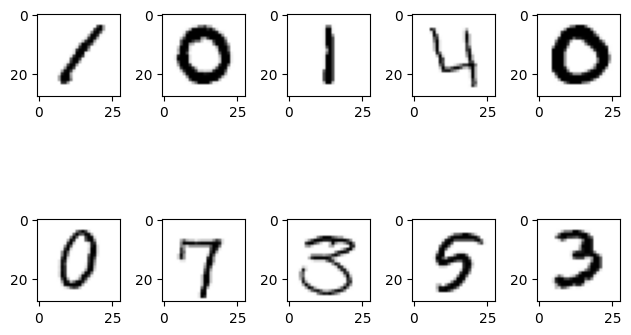

In [4]:
# Feature Engineering & 데이터 전처리
# Feature Engineering : 수행할 작업이 없어요!
# 결측치 X 이상치 X
# 정규화
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 우리가 학습해야 할 데이터는 다중분류이기 때문에
# t_data는 one-hot encoding으로 처리해야해요!
# 하지만 keras 설정으로 대신할거에요!

# 이미지 10장만 눈으로 확인해 보아요!
fig = plt.figure()

axes = [] # subplot을 10개 만들어서 리스트 안에 저장
for i in range(10):
    axes.append(fig.add_subplot(2, 5, i + 1))
    axes[i].imshow(x_data[i].reshape(28, 28), cmap='gray_r')

plt.tight_layout()
plt.show()

In [5]:
# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 test_size=0.2, stratify=t_data)

In [6]:
# Model 구현
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=1e-1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습 진행
history = model.fit(x_data_train_norm, t_data_train,
                    epochs=100, verbose=1,
                    validation_split=0.3, batch_size=100)
# Epoch 100/100
# 236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 1.0000 - loss: 8.1603e-04 - val_acc: 0.9686 - val_loss: 0.1702

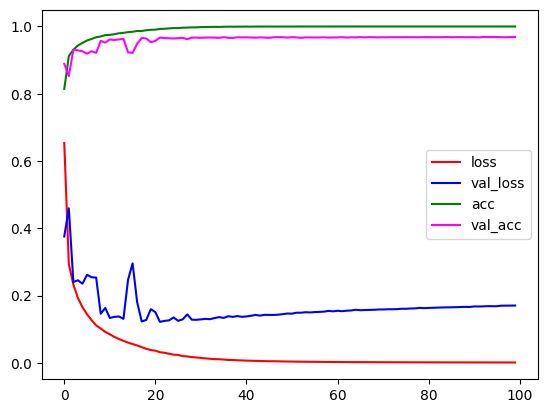

In [9]:
# 학습 종료 후 그래프 확인
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.plot(history.history['acc'], color='g')
plt.plot(history.history['val_acc'], color='magenta')

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])

plt.show()

In [11]:
# Model 구현
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=1e-1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

# EarlyStopping callback
es_callback = EarlyStopping(monitor='val_loss', patience=5,
                            restore_best_weights=True, verbose=1)

# Checkpoint callback


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습 진행
history = model.fit(x_data_train_norm, t_data_train,
                    epochs=100, verbose=1,
                    validation_split=0.3, batch_size=100,
                    callbacks=[es_callback])
# Epoch 23/100
# 236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9936 - loss: 0.0264 - val_acc: 0.9633 - val_loss: 0.1346
# Epoch 23: early stopping
# Restoring model weights from the end of the best epoch: 18.

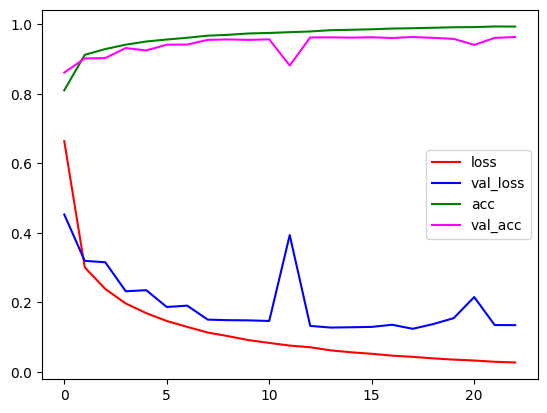

In [13]:
# 학습 종료 후 그래프 확인
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.plot(history.history['acc'], color='g')
plt.plot(history.history['val_acc'], color='magenta')

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])

plt.show()

In [15]:
# Evaluation (성능평가)
print(classification_report(t_data_test, np.argmax(model.predict(x_data_test_norm), axis=1)))

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.99      0.98      0.99       937
           2       0.97      0.95      0.96       835
           3       0.96      0.93      0.94       870
           4       0.96      0.96      0.96       814
           5       0.93      0.96      0.94       759
           6       0.98      0.98      0.98       827
           7       0.96      0.98      0.97       880
           8       0.94      0.96      0.95       813
           9       0.95      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
!pip install mglearn

In [8]:
# SVM 구현
# 예제 데이터는 mglearn에 있는 데이터를 사용
# Decision Boundaries를 눈으로 확인해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import SVC # Support Vector Classifier(분류기) SVR -> Support Vector Regressor
# decision boundaries는 그리디가 힘들어요!
# 라이브러리를 이용해서 결정경계를 그려볼거에요!
from mlxtend.plotting import plot_decision_regions

In [ ]:
# 데이터부터 가져와요!
x_data, t_data = mglearn.datasets.make_forge()
print(x_data)
print(t_data)

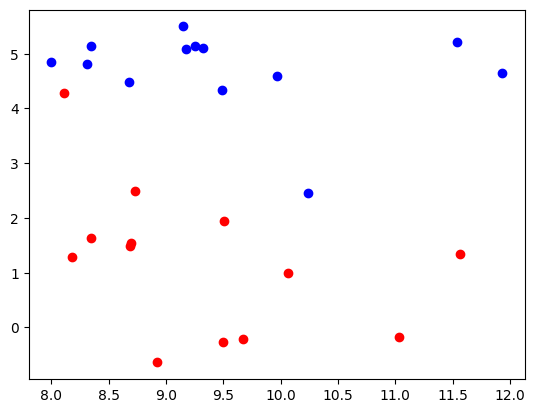

In [9]:
# matplotlib을 이용해서
# t_data가 0인 점은 red로, t_data가 1인 점은 blue로 표현
# 데이터의 분포를 눈으로 확인하고 싶어요!
x_data_red = x_data[t_data == 0]
x_data_blue = x_data[t_data == 1]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')

plt.show()

In [15]:
model = SVC(kernel='linear') # C는 기본값 1
model.fit(x_data, t_data)

print(f'찾아낸 support vector : {model.support_vectors_}')
print(f'찾아낸 support vector의 개수 : {model.n_support_}')

찾아낸 support vector : [[ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]
찾아낸 support vector의 개수 : [3 3]


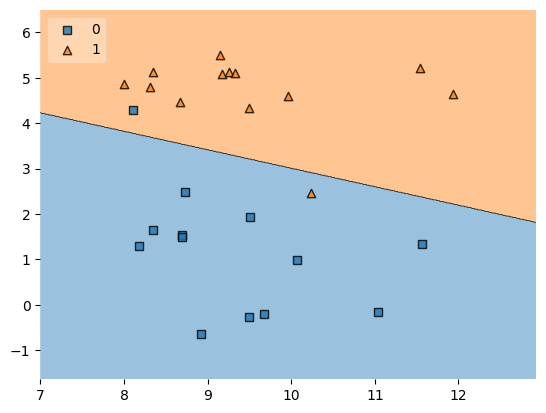

In [17]:
plot_decision_regions(X=x_data, y=t_data,
                      clf=model, legend=2)
plt.show()

In [18]:
# Iris Data Set을 이용해서
# 다중분류를 할 수 있는 머신러닝 모델을 구현하고 정확도를 측정해보세요!
# Logistic Regression을 이용한 다중 분류
# SVM을 이용한 다중 분류
# 정확도를 비교 출력한 후 Decision Boundaries를 그려보세요!
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import classification_report

In [28]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['label'] = iris.target
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
# 결측치 확인 및 처리
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
label,0


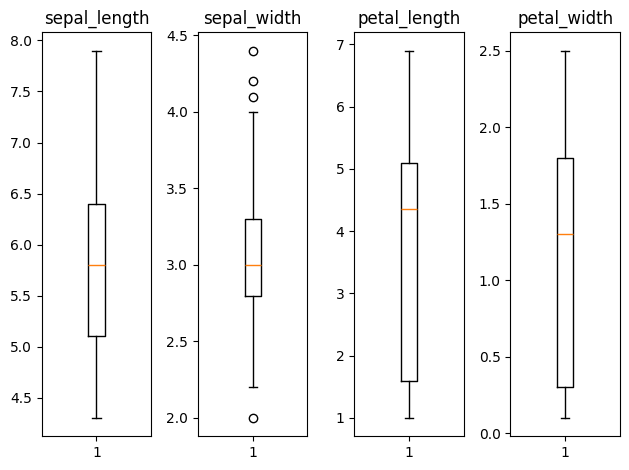

In [30]:
# 이상치 확인 및 처리
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.set_title('sepal_length')
ax2.set_title('sepal_width')
ax3.set_title('petal_length')
ax4.set_title('petal_width')

ax1.boxplot(df['sepal_length'])
ax2.boxplot(df['sepal_width'])
ax3.boxplot(df['petal_length'])
ax4.boxplot(df['petal_width'])

plt.tight_layout()

plt.show()

In [32]:
# 중복데이터 처리
print(df.duplicated().sum())

df = df.drop_duplicates()
print(df.shape)

1
(149, 5)


In [44]:
# 정규화
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

scaler = MinMaxScaler()
scaler = scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [38]:
# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 test_size=0.2, stratify=t_data)

In [ ]:
# Tensorflow Model
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=64, activation='relu'))
keras_model.add(Dense(units=128, activation='relu'))
keras_model.add(Dense(units=3, activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

es_callback = EarlyStopping(monitor='val_loss', patience=5,
                            restore_best_weights=True, verbose=1)

history = keras_model.fit(x_data_train_norm, t_data_train,
                          epochs=500, verbose=1,
                          validation_split=0.2, batch_size=100,
                          callbacks=[es_callback])
# Epoch 50/500
# 1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - acc: 1.0000 - loss: 0.0155 - val_acc: 0.9583 - val_loss: 0.0682
# Epoch 50: early stopping
# Restoring model weights from the end of the best epoch: 45.

In [71]:
# Tensorflow Model 평가
keras_result = keras_model.predict(x_data_test_norm)
keras_result = np.argmax(keras_result, axis=1)

print(classification_report(t_data_test, keras_result,
                            target_names=['Setosa', 'Vesicolor', 'Virsinica']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Vesicolor       0.83      1.00      0.91        10
   Virsinica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
# SVM Model 학습
svc_model = SVC(kernel='linear')
svc_model.fit(x_data_train_norm, t_data_train)

In [72]:
# SVM Model 평가
svc_result = svc_model.predict(x_data_test_norm)

print(classification_report(t_data_test, svc_result,
                            target_names=['Setosa', 'Vesicolor', 'Virsinica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Vesicolor       0.77      1.00      0.87        10
   Virsinica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

